# Курсовая работа
 Выполнила:
 студента группы БФИ2202
 Красько А.Л.

In [291]:
import csv
import matplotlib.pyplot as plt

CAPACITY = 10
PATH = 'sales_data.csv'


In [232]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


class HashTable: 
    def __init__(self, capacity):
        self.capacity = capacity
        self.size = 0
        self.table = [None] * capacity

    def _hash(self, key):
        return hash(key) % self.capacity
    
    def insert(self, key, value):
        index = self._hash(key)
        if self.table[index] is None:
            self.table[index] = Node(key, value)
            self.size += 1
        else:
            current = self.table[index]
            while current: 
                if current.key == key:
                    current.value = value
                    return
                current = current.next
            new_node = Node(key, value)
            new_node.next = self.table[index]
            self.table[index] = new_node
            self.size += 1
            if self.size > 0.8 * self.capacity:
                self.resize()
        
    def search(self, key):
        index = self._hash(key)
        current = self.table[index]
        while current:
            if current.key == key:
                return current.value
            current = current.next
        raise KeyError(key)

    def resize(self):
        new_capacity = self.capacity * 2
        new_table = [None] * new_capacity
        for i in range(self.capacity):
            node = self.table[i]
            while node:
                index = self._hash(node.key)
                if new_table[index]:
                    new_node = new_table[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_table[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.table = new_table
    
    def get_table(self): 
        elements = [] 
        for i in range(self.capacity): 
            current = self.table[i] 
            while current: 
                elements.append((current.key, current.value)) 
                current = current.next
        return elements

In [308]:
def import_data(file_path: str, data: HashTable):
    """Импорт данных из cvs файла."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            for row in reader:
                data.insert(row['Название товара'], {'quantity': int(row['Количество продаж']), 'price': float(row['Цена за единицу'])})
        return data
    except FileNotFoundError:
        print('CSV файл не найден!')
    except KeyError:
        print('Файл запонен неправильно!')


In [234]:
def quick_sort(array: list, sort_by):
    """Быстрая сортировка."""
    if len(array) <= 1:
        return array
    middle_element_index = len(array) // 2
    if sort_by == 'revenue':
        pivot = array[middle_element_index][1]['quantity'] * array[middle_element_index][1]['price']
    else:
        pivot = array[middle_element_index][0]
    left, center, right = partition(array, pivot, sort_by)
    return quick_sort(left, sort_by=sort_by) + center + quick_sort(right, sort_by=sort_by)

def partition(array, pivot, sort_by):
    left, center, right = [], [], []
    for item in array:
        if sort_by == 'revenue':
            parametr = item[1]['quantity']*item[1]['price']
        else:
            parametr = item[0]
        if parametr > pivot:
            left.append(item)
        elif parametr < pivot:
            right.append(item)
        elif parametr == pivot:
            center.append(item)
    return left, center, right


In [339]:
def bin_search(arr, product_name):
    print(f'Поиск товара {product_name}...')
    length = len(arr)
    data = quick_sort(arr, sort_by='name')
    left_point = 0
    right_point = length - 1
    while left_point <= right_point:
        mid = (left_point + right_point) // 2
        if data[mid][0] > product_name:
            left_point = mid + 1
        elif data[mid][0] == product_name:
            print(f'Товар {product_name} найден!')
            return data[mid]
        else:
            right_point = mid - 1
    return 'Товар не найден'

In [334]:
def calculate_revenue(data: list):
    sorted_data = quick_sort(data, sort_by='revenue')
    product_names = [product[0] for product in sorted_data]
    quantity = [product[1]['quantity'] for product in sorted_data]
    revenue = [product[1]['price']*product[1]['quantity'] for product in sorted_data]
    max_quantity = sorted_data[0]
    
    for item in sorted_data:
        if item[1]['quantity'] > max_quantity[1]['quantity']:
            max_quantity = item
    
    max_revenue = sorted_data[0][1]['quantity']*sorted_data[0][1]['price']
    total_revenue = sum(revenue)
    share = [round(((item[1]['quantity']*item[1]['price'])/total_revenue)*100,2) for item in sorted_data]
    
    print('Товар, отсортированный по выручке:')
    for index in range(len(sorted_data)):
        print(sorted_data[index], f' revenue: {revenue[index]:.2f}, share: {share[index]}%')
    print(f'\nОтчет')
    print(f'Общая выручка магазина: {total_revenue:.2f}')
    print('Наибольшое количество раз был продан {0}: {1} раз'.format(max_quantity[0], max_quantity[1]['quantity']))
    print(f'Наибольшую выручку принес {sorted_data[0][0]}: {max_revenue:.2f}')
    
    plt.barh(product_names, quantity, label='Количество единиц проданного товара')
    plt.xlabel('Товар')
    plt.ylabel('Продажи')
    plt.title('График продаж')
    plt.legend()
    plt.show()
    plt.close()
    plt.pie(share, labels=product_names)
    plt.title('Доля каждого товара в выручке')


Поиск товара TableB...
Товар TableB найден!
('TableB', {'quantity': 3, 'price': 149.99})

Товар, отсортированный по выручке:
('SofaE', {'quantity': 2, 'price': 599.99})  revenue: 1199.98, share: 15.91%
('ThingamajigB', {'quantity': 27, 'price': 24.99})  revenue: 674.73, share: 8.94%
('GadgetY', {'quantity': 30, 'price': 19.99})  revenue: 599.70, share: 7.95%
('RugD', {'quantity': 7, 'price': 79.99})  revenue: 559.93, share: 7.42%
('GadgetX', {'quantity': 18, 'price': 29.99})  revenue: 539.82, share: 7.16%
('WidgetA', {'quantity': 25, 'price': 19.99})  revenue: 499.75, share: 6.63%
('GizmoZ', {'quantity': 32, 'price': 14.99})  revenue: 479.68, share: 6.36%
('WidgetC', {'quantity': 20, 'price': 22.99})  revenue: 459.80, share: 6.1%
('TableB', {'quantity': 3, 'price': 149.99})  revenue: 449.97, share: 5.97%
('ChairA', {'quantity': 5, 'price': 89.99})  revenue: 449.95, share: 5.96%
('DoohickeyY', {'quantity': 41, 'price': 9.99})  revenue: 409.59, share: 5.43%
('LampC', {'quantity': 12, 'pr

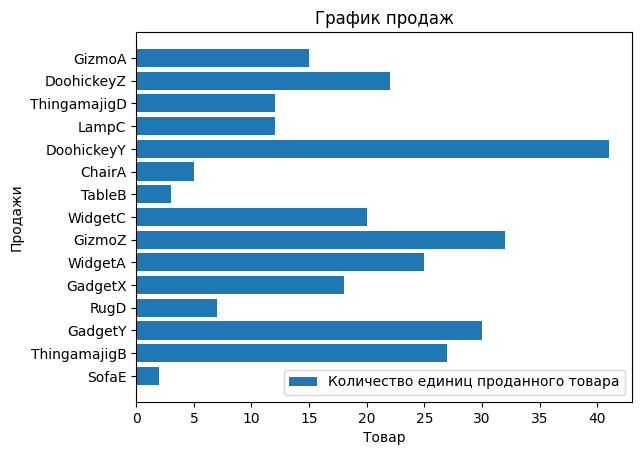

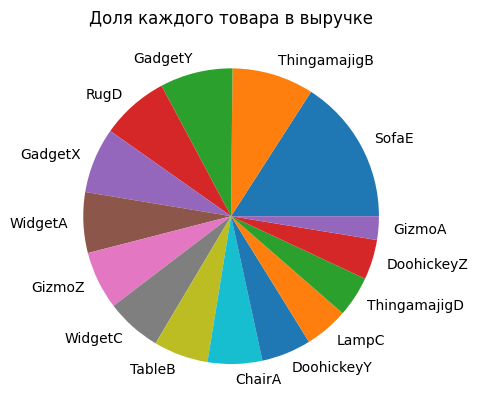

In [345]:
data = import_data(PATH, HashTable(CAPACITY)).get_table()
product_name = 'TableB' 
print(bin_search(data, product_name), end='\n\n')

calculate_revenue(data)